In [ ]:
#load dataset

!wget https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip

--2021-07-20 04:37:39--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘rockpaperscissors.zip’

rockpaperscissors.z 100%[===================>] 307.92M  4.34MB/s    in 60s     

2021-07-20 04:38:39 (5.15 MB/s) - ‘rockpaperscissors.zip’ saved [322873683/322873683]



In [ ]:
!unzip "/content/rockpaperscissors.zip" -d "/content/"

Streaming output truncated to the last 5000 lines.
  inflating: /content/rockpaperscissors/scissors/KNNsNhduqSfuqEK5.png  
  inflating: /content/__MACOSX/rockpaperscissors/scissors/._KNNsNhduqSfuqEK5.png  
  inflating: /content/rockpaperscissors/scissors/xAnfzBYnsnuru9Nf.png  
  inflating: /content/__MACOSX/rockpaperscissors/scissors/._xAnfzBYnsnuru9Nf.png  
  inflating: /content/rockpaperscissors/scissors/caj9PiWZ2BenuxXF.png  
  inflating: /content/__MACOSX/rockpaperscissors/scissors/._caj9PiWZ2BenuxXF.png  
  inflating: /content/rockpaperscissors/scissors/5CzwWCDnxKOJz5T0.png  
  inflating: /content/__MACOSX/rockpaperscissors/scissors/._5CzwWCDnxKOJz5T0.png  
  inflating: /content/rockpaperscissors/scissors/7dBQ0fOpCs03OmnR.png  
  inflating: /content/__MACOSX/rockpaperscissors/scissors/._7dBQ0fOpCs03OmnR.png  
  inflating: /content/rockpaperscissors/scissors/DXQaN15KphkE4i7z.png  
  inflating: /content/__MACOSX/rockpaperscissors/scissors/._DXQaN15KphkE4i7z.png  
  inflating: /conte

In [ ]:
#instalasi split folders untuk digunakan sebagai pemisah folder train dan calidation
!pip install split-folders


In [ ]:
import tensorflow as tf
import splitfolders
import os


In [ ]:
#menyimpan image kedalam variabel dir
dir = '/content/rockpaperscissors/rps-cv-images'
os.listdir(dir)

['paper', 'README_rpc-cv-images.txt', 'scissors', 'rock']

In [ ]:
#melakukan pemisahan folder train dan validation dengan menggunakan splitfolders
splitfolders.ratio(dir,output='output',seed=1337,ratio=(.6,.4))
train_dir = 'output/train'
validation_dir = 'output/val'

Copying files: 2188 files [00:00, 3642.32 files/s]


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
 
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    zoom_range = 0.1, 
                    width_shift_range=0.2,  
                    height_shift_range=0.2)  
                    
 
test_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2)

In [ ]:
train_generator = train_datagen.flow_from_directory(
        train_dir, 
        target_size=(150, 150),  
        batch_size=4,
        class_mode='categorical') 
 
validation_generator = test_datagen.flow_from_directory(
        validation_dir, 
        target_size=(150, 150), 
        batch_size=4, 
        class_mode='categorical') 

Found 1312 images belonging to 3 classes.
Found 876 images belonging to 3 classes.


In [ ]:
#membuat arsitektu model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), padding='Same', activation='relu',  input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3,3), padding='Same', activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), padding='Same', activation='relu'),
    tf.keras.layers.Conv2D(128, (3,3), padding='Same', activation='relu'),
    tf.keras.layers.MaxPooling2D(4,4),
    tf.keras.layers.MaxPooling2D(2,2), 
    
    tf.keras.layers.Flatten(), 
    tf.keras.layers.Dense(256, activation='relu'), 
    tf.keras.layers.Dropout(0.1), 
    
    tf.keras.layers.Dense(256, activation='relu'), 
    tf.keras.layers.Dropout(0.2), 

    tf.keras.layers.Dense(3, activation='softmax') 
])                         


In [ ]:
# compile model dengan 'rmsprop' optimizer loss function 'categorical_crossentropy' 
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.RMSprop(learning_rate=0.001), 
              metrics=['accuracy'])

model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 150, 150, 32)      896       
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 75, 75, 64)        18496     
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 37, 37, 64)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 37, 37, 128)       73856     
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 37, 37, 128)       147584    
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 9, 9, 128)        

In [ ]:
# latih model dengan model.fit 
hist=model.fit(
      train_generator,
      steps_per_epoch= 120,  
      epochs= 60, 
      validation_data=validation_generator, 
      validation_steps=5,  
      verbose=1)

Epoch 1/60
120/120 [==============================] - 4s 35ms/step - loss: 0.3509 - accuracy: 0.9042 - val_loss: 0.2070 - val_accuracy: 0.9500
Epoch 2/60
120/120 [==============================] - 4s 35ms/step - loss: 0.3078 - accuracy: 0.9104 - val_loss: 0.1431 - val_accuracy: 0.9000
Epoch 3/60
120/120 [==============================] - 4s 32ms/step - loss: 0.2959 - accuracy: 0.9187 - val_loss: 0.6987 - val_accuracy: 0.8000
Epoch 4/60
120/120 [==============================] - 4s 33ms/step - loss: 0.2915 - accuracy: 0.9208 - val_loss: 0.0781 - val_accuracy: 0.9500
Epoch 5/60
120/120 [==============================] - 4s 33ms/step - loss: 0.2614 - accuracy: 0.9396 - val_loss: 0.0860 - val_accuracy: 1.0000
Epoch 6/60
120/120 [==============================] - 4s 33ms/step - loss: 0.1658 - accuracy: 0.9458 - val_loss: 0.0850 - val_accuracy: 0.9500
Epoch 7/60
120/120 [==============================] - 4s 32ms/step - loss: 0.3422 - accuracy: 0.9458 - val_loss: 9.8672 - val_accuracy: 0.4000

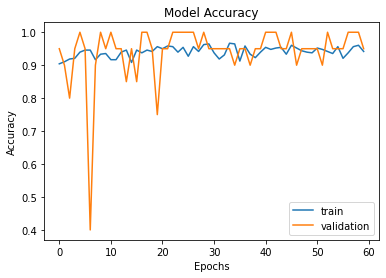

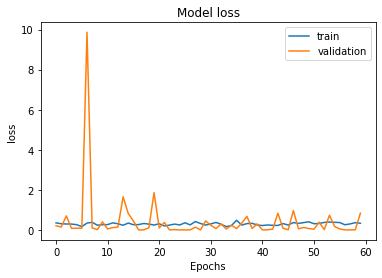

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Menampilkan plot loss dari model
acc = hist.history['accuracy']
validation_acc = hist.history['val_accuracy']
epochs = range(len(acc))

plt.plot(epochs, acc)
plt.plot(epochs, validation_acc)

plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

# Menampilkan plot akurasi dari model
loss = hist.history['loss']
validation_loss = hist.history['val_loss']

plt.plot(epochs,loss)
plt.plot(epochs, validation_loss)

plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

Saving n1H2YStjFsCwmlYz.png to n1H2YStjFsCwmlYz.png
paper


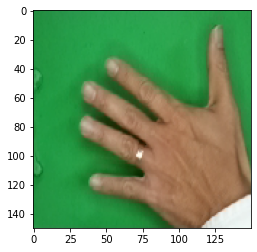

In [ ]:
%matplotlib inline
uploaded = files.upload()
 
for fn in uploaded.keys():
 
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)

  category = np.argmax(classes[0])
  if(category==0):
    print('paper')
  elif(category==1):
    print('rock')
  elif(category==2):
    print('scissors')
